# Minimum Viable Product (MVP) Template

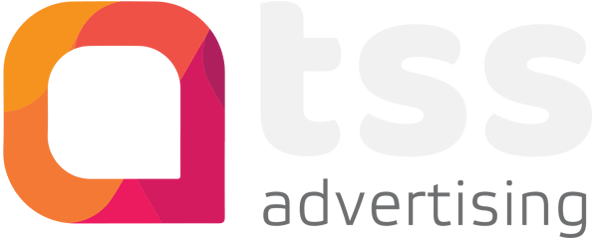

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [4]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

In [5]:
df3 = get_data([210327,210320,210313,210306])
df6 = get_data([210626,210619,210612,210605])
df8 = get_data([210828,210821,210814,210807])

In [6]:
df6["month"]=6
df3["month"]=3
df8["month"]=8

In [7]:
frames = [df6,df3,df8]
df = pd.concat(frames)
df.sample(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month
205704,R644,R135,01-06-01,NEWKIRK AV,25,IRT,08/11/2021,17:00:00,REGULAR,603600,10775424,8
82120,N312,R339,00-00-00,36 ST,MR,IND,03/13/2021,16:00:00,REGULAR,997055,1035898,3
173219,R293,R133,00-00-04,MOSHOLU PKWY,4,IRT,08/23/2021,21:00:00,REGULAR,5611444,3772507,8
206324,R647,R110,02-05-02,FLATBUSH AV-B.C,25,IRT,03/02/2021,12:00:00,REGULAR,178111,2580454,3
29476,E009,R370,00-00-02,71 ST,D,BMT,06/15/2021,04:00:00,REGULAR,9976959,2456488,6
186919,R509,R121,00-00-04,QUEENSBORO PLZ,7NQW,IRT,03/21/2021,08:00:00,REGULAR,1065290,236563,3
201129,R618,R058,01-00-01,BERGEN ST,23,IRT,06/08/2021,20:00:00,REGULAR,1425813,2066736,6
155254,R210A,R044,03-06-00,BROOKLYN BRIDGE,456JZ,IRT,03/05/2021,03:00:00,REGULAR,19421,20777,3
206080,S101A,R070,01-00-05,ST. GEORGE,1,SRT,03/17/2021,16:00:00,REGULAR,376025,69,3
207,A002,R051,02-03-02,59 ST,NQR456W,BMT,08/20/2021,12:00:00,REGULAR,62021,86746,8


## Data pre-processing 

In [8]:
df.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
month                                                                   0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['turnstile'] = df['C/A'] + '-' + df['UNIT'] + '-' + df['SCP']

In [11]:
df.columns=df.columns.str.strip()

In [12]:
df.SCP.str.replace("/",'-')

0         02-00-00
1         02-00-00
2         02-00-00
3         02-00-00
4         02-00-00
            ...   
209497    00-05-01
209498    00-05-01
209499    00-05-01
209500    00-05-01
209501    00-05-01
Name: SCP, Length: 2509853, dtype: object

#### Finding Daily entries, Daily exits and traffic based on turnstile:

In [13]:
turnstiles_daily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        [["ENTRIES","EXITS","month","turnstile","LINENAME","TIME"]].first())
turnstiles_daily.sample(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,month,turnstile,LINENAME,TIME
317763,R228,R143,00-00-01,28 ST,06/15/2021,299027,366739,6,R228-R143-00-00-01,6,01:00:00
201820,N506,R022,00-03-02,34 ST-HERALD SQ,06/11/2021,800955,873542,6,N506-R022-00-03-02,BDFMNQRW,00:00:00
109898,N063A,R011,00-00-02,42 ST-PORT AUTH,03/23/2021,242132043,224934845,3,N063A-R011-00-00-02,ACENQRS1237W,00:00:00
94651,N016A,R296,00-00-03,163 ST-AMSTERDM,05/30/2021,301537,404802,6,N016A-R296-00-00-03,C,01:00:00
174605,N330,R202,00-00-00,63 DR-REGO PARK,06/05/2021,7609782,6863385,6,N330-R202-00-00-00,MR,00:00:00
24037,A069,R044,01-00-01,CHAMBERS ST,07/31/2021,130444,274755,8,A069-R044-01-00-01,JZ456,00:00:00
281164,R141,R031,00-03-00,34 ST-PENN STA,08/21/2021,2249727,1938527,8,R141-R031-00-03-00,123,00:00:00
95002,N016A,R296,00-03-03,163 ST-AMSTERDM,06/14/2021,777503,248143,6,N016A-R296-00-03-03,C,01:00:00
232762,N702,R572,00-00-02,96 ST-2 AVE,03/03/2021,35998,19087,3,N702-R572-00-00-02,Q,00:00:00
411160,R639,R109,00-05-01,CHURCH AV,05/29/2021,7,1312,6,R639-R109-00-05-01,25,01:00:00


In [14]:
turnstiles_daily["DAILY_ENTRIES"] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]].diff())
turnstiles_daily.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)
turnstiles_daily.drop(turnstiles_daily[turnstiles_daily.DAILY_ENTRIES <0].index,inplace = True)

turnstiles_daily["DAILY_EXITS"] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])[["EXITS"]].diff())
turnstiles_daily.drop(turnstiles_daily[turnstiles_daily.DAILY_EXITS <0].index,inplace = True)
turnstiles_daily.dropna(subset=["DAILY_EXITS"], axis=0, inplace = True)

In [15]:
turnstiles_daily["TRAFFIC"] = turnstiles_daily["DAILY_ENTRIES"] + turnstiles_daily["DAILY_EXITS"]

#### Create a new column for the days of the week:

In [16]:
turnstiles_daily['DATETIME'] = turnstiles_daily["DATE"]+ " " + turnstiles_daily["TIME"]
turnstiles_daily['DATETIME'] = pd.to_datetime(turnstiles_daily['DATETIME'], format='%m/%d/%Y %H:%M:%S')
turnstiles_daily["NAMEOFDAY"]= turnstiles_daily["DATETIME"].dt.day_name()

In [17]:
turnstiles_daily.groupby("month").DAILY_ENTRIES.mean()

month
3      565.880481
6    42749.411803
8     1181.983840
Name: DAILY_ENTRIES, dtype: float64

#### Finding top 7 busiest stations based on traffic:

In [18]:
mta_top7 = turnstiles_daily.groupby("STATION").TRAFFIC.sum().sort_values(ascending=False).head(7)
mta_top7 = mta_top7.reset_index()
mta_top7 

,STATION,TRAFFIC
0,125 ST,3.051509e+09
1,HEWES ST,2.807861e+09
2,HUNTS POINT AV,2.316701e+09
3,FORDHAM RD,1.840888e+09
4,MORISN AV/SNDVW,1.705756e+09
5,WORLD TRADE CTR,7.979482e+08
6,96 ST-2 AVE,6.894789e+08


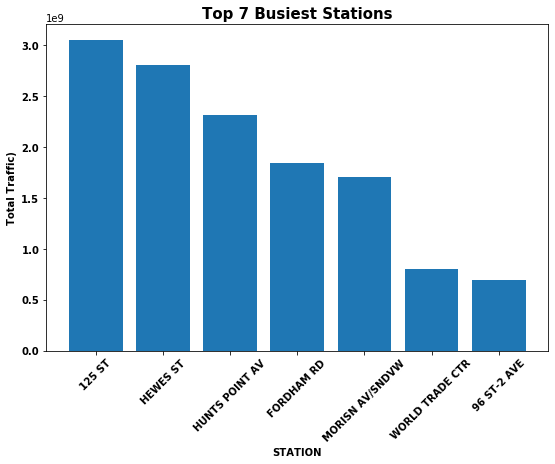

In [21]:
plt.figure(figsize=(9,6)),
plt.bar(x="STATION", height="TRAFFIC", data=mta_top7)
plt.title("Top 7 Busiest Stations", weight="bold",fontsize=15)
plt.xlabel("STATION",weight="bold",c="k")
plt.xticks(rotation=45, weight="bold")
plt.ylabel("Total Traffic)",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.show()

Through this Bar plot, it becomes clear to us that the (125 ST) station is the most crowded station during the month of March and June, August, and from here we can determine the prices of advertising screens according to the busiest station

#### Finding total traffic based on days: 

In [22]:
mta_busiest_day = turnstiles_daily.groupby("NAMEOFDAY").TRAFFIC.sum().sort_values(ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day

,NAMEOFDAY,TRAFFIC
0,Saturday,1.055752e+10
1,Tuesday,2.534987e+09
2,Friday,8.556627e+08
3,Wednesday,7.623945e+08
4,Thursday,4.939116e+07
5,Sunday,3.205250e+07
6,Monday,2.540278e+07


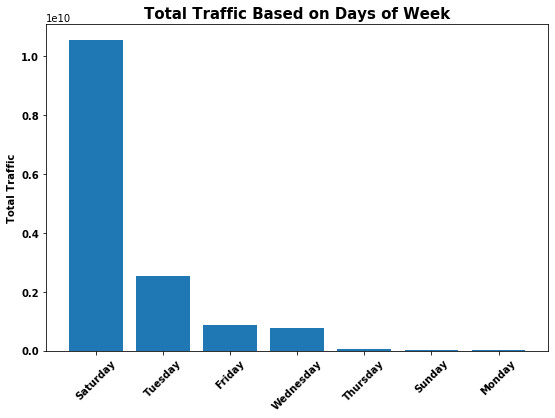

In [26]:
plt.figure(figsize=(9,6)),
plt.bar(x="NAMEOFDAY", height="TRAFFIC", data=mta_busiest_day)
plt.title("Total Traffic Based on Days of Week", weight="bold",fontsize=15)
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(rotation=45,weight="bold")
plt.show()

The bar blot shows the traffic according to the days of the week, and it turns out that Saturday is the most traffic day of the week. This graph may serve our problem in determining the advertising price according to the day of the show.